In [1]:
from datetime import datetime
from article import outlet, dayPeriod, relatedWords
import matplotlib.pyplot as plt

In [2]:
mediaName = "ABC News"
backupDate = "12.07.21"

path = "Backups/" + backupDate + "/processed/" + mediaName + ".txt"

In [3]:
dataFile = open(path, "r", encoding='utf-8')
rawData = dataFile.readlines()
dataFile.close()
print(rawData)

['<searchWord>\n', '<commonWordCount>2\n', '\n', '<date>2021-07-02 00:00:00\n', '<freq>35\n', '<avgSentiment>-0.119\n', '<commonWord>0police\n', '<commonWordFreq>04\n', '<linkWordName>covid\n', '<linkScore>7.75\n', '<commonWord>1years\n', '<commonWordFreq>14\n', '<linkWordName>covid\n', '<linkScore>4.32812\n', '\n', '<date>2021-07-03 00:00:00\n', '<freq>50\n', '<avgSentiment>-0.06\n', '<commonWord>0covid\n', '<commonWordFreq>07\n', '<linkWordName>new\n', '<linkScore>10.01562\n', '<commonWord>1new\n', '<commonWordFreq>16\n', '<linkWordName>covid-19\n', '<linkScore>14.29688\n', '\n', '<date>2021-07-04 00:00:00\n', '<freq>42\n', '<avgSentiment>-0.101\n', '<commonWord>0new\n', '<commonWordFreq>04\n', '<linkWordName>covid-19\n', '<linkScore>14.29688\n', '<commonWord>1covid-19\n', '<commonWordFreq>13\n', '<linkWordName>covid\n', '<linkScore>4.48429\n', '\n', '<date>2021-07-05 00:00:00\n', '<freq>45\n', '<avgSentiment>-0.127\n', '<commonWord>0covid-19\n', '<commonWordFreq>06\n', '<linkWordNam

In [4]:
searchWord = rawData[0]
searchWord = searchWord[12:-1] # Decode the searchWord

commonWordsCount = rawData[1]
commonWordsCount = int(commonWordsCount[17:-1])

media = outlet(mediaName)
for wordIndex, word in enumerate(rawData):
    word = word.strip()
    if wordIndex > 2:
        if "<date>" in word:
            date = datetime.strptime(word[6:], "%Y-%m-%d %H:%M:%S")
            dateFreq = rawData[wordIndex + 1] 
            dateFreq = int(dateFreq[6:-1])
            avgSentiment = rawData[wordIndex + 2]
            avgSentiment = float(avgSentiment[14:-1])
            commonWord = []
            for i in range(commonWordsCount):
                thisWord = rawData[wordIndex + 3 + (i * 4)]
                thisNextWord = rawData[wordIndex + 4 + (i * 4)]
                if int(thisWord[12:13]) == i:
                    commonWord.append((thisWord[13:-1], int(thisNextWord[17:-1])))

            media.addDays(dayPeriod(date, dateFreq, commonWord, avgSentiment))
    

            

In [5]:
for today in media.getDays():
    for i in range(commonWordsCount):
        today.setRelatedWords(relatedWords(today.commonWord[i][1], []))

In [6]:
for todayIndex, today in enumerate(media.getDays()):
    for i in range(commonWordsCount):
        linkScore = rawData[9 + (i * 4) + (todayIndex * 12)]
        linkScore = float(linkScore[11:-1])
        linkWord = rawData[8 + (i * 4) + (todayIndex * 12)]
        linkWord = linkWord[14:-1]
        link = relatedWords(linkWord, [])
        today.relatedWords[i].setLink(link, linkScore)

<IPython.core.display.Javascript object>


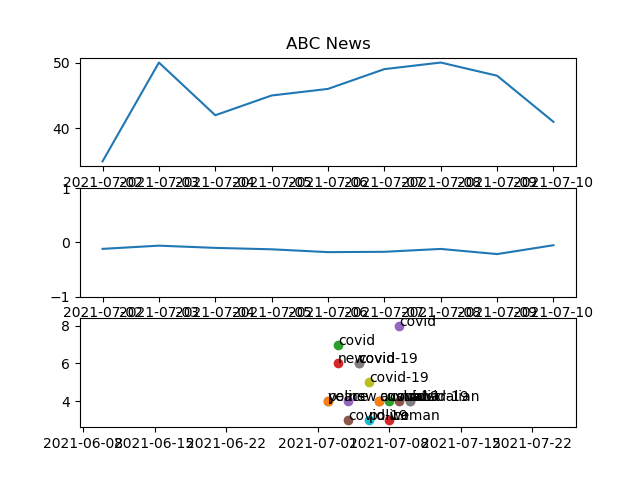

[('police', 4), ('years', 4)]
[('police', 4), ('years', 4)]
[('covid', 7), ('new', 6)]
[('covid', 7), ('new', 6)]
[('new', 4), ('covid-19', 3)]
[('new', 4), ('covid-19', 3)]
[('covid-19', 6), ('covid', 6)]
[('covid-19', 6), ('covid', 6)]
[('covid-19', 5), ('police', 3)]
[('covid-19', 5), ('police', 3)]
[('australia', 4), ('covid-19', 4)]
[('australia', 4), ('covid-19', 4)]
[('covid', 4), ('woman', 3)]
[('covid', 4), ('woman', 3)]
[('covid', 8), ('man', 4)]
[('covid', 8), ('man', 4)]
[('australian', 4), ('covid-19', 4)]
[('australian', 4), ('covid-19', 4)]


In [7]:
%matplotlib notebook

fig, ax = plt.subplots(3)

dates = []

articleCounts = []
avgSentiment = []

for today in media.getDays():
    dates.append(today.date)
    articleCounts.append(today.freq)
    avgSentiment.append(today.avgSentiment)
    
    for i in range(commonWordsCount):
        ax[2].scatter(today.date, today.commonWord[i][1])
        ax[2].annotate(today.commonWord[i][0], [today.date, today.commonWord[i][1]])
        print(today.commonWord)
        
    
    
ax[0].set_title(mediaName) 
ax[0].plot(dates, articleCounts)

ax[1].plot(dates, avgSentiment)
ax[1].set_ylim(-1, 1)

plt.show()

<IPython.core.display.Javascript object>


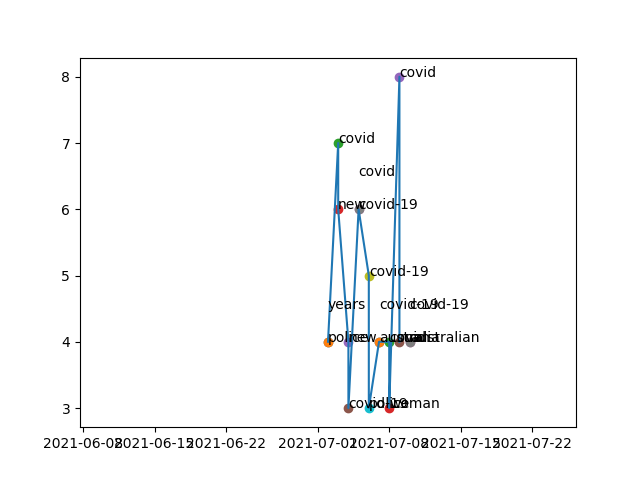

police - covid
years - covid
covid - new
new - covid-19
new - covid-19
covid-19 - covid
covid-19 - covid-19
covid - police
covid-19 - australia
police - australia
australia - covid
covid-19 - covid
covid - covid
woman - man
covid - australian
man - australian


In [8]:
%matplotlib notebook

dates = []

articleCounts = []
avgSentiment = []

for today in media.getDays():
    dates.append(today.date)
    articleCounts.append(today.freq)
    avgSentiment.append(today.avgSentiment)
    pastFreq = 0
    overlapCount = 0
    for i in range(commonWordsCount):
        try:
            plt.scatter(today.date, today.commonWord[i][1])
            if pastFreq == today.commonWord[i][1]:
                overlapCount += 0.5
                plt.annotate(today.commonWord[i][0], [today.date, float(today.commonWord[i][1] + overlapCount)])
            else:
                plt.annotate(today.commonWord[i][0], [today.date, today.commonWord[i][1]])
            pastFreq = today.commonWord[i][1]
        except IndexError:
            pass
x = []
y = []
for todayIndex, today in enumerate(media.getDays()):
    if todayIndex + 1 != len(media.getDays()):
        for commonCount in range(commonWordsCount):
            link = today.relatedWords[commonCount].nextLink
            print(today.commonWord[commonCount][0] + " - " + link.wordName)
            x.append(today.date)
            y.append(today.commonWord[commonCount][1])
            for i in media.getDays():
                if i.relatedWords[commonCount] == link:
                    x.append(i.date)
                    y.append(link.commonWord[commonCount][1])
        
plt.plot(x, y)
plt.show()

police - covid
years - covid
covid - new
new - covid-19
new - covid-19
covid-19 - covid
covid-19 - covid-19
covid - police
covid-19 - australia
police - australia
australia - covid
covid-19 - covid
covid - covid
woman - man
covid - australian
man - australian
